In [1]:
import wfdb as wf
import numpy as np
from datasets import mitdb as dm

In [2]:
# Load paths of avaliable data files

records = dm.get_records()
print('There are {} record files'.format(len(records)))

There are 48 record files


In [3]:
# Select one of them
path = records[0]
print('Loading file:', path)

Loading file: data/mitdb\100


In [39]:
path

'data/mitdb\\100'

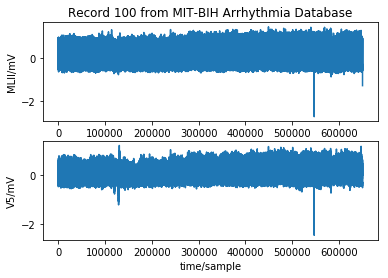

In [25]:
record = wf.rdrecord(path)
wf.plot_wfdb(record=record, title='Record 100 from MIT-BIH Arrhythmia Database')

In [42]:
signals, fields = wf.rdsamp(path)
fields

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

In [17]:
from IPython.display import display

display(signals)
display(fields)

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

In [45]:
annotation = wf.rdann(path, 'atr')
annotation.fs

360

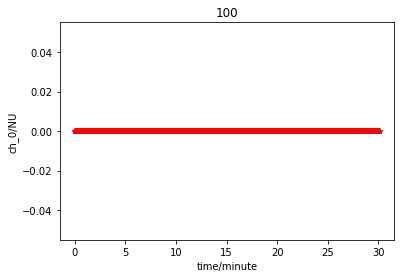

In [21]:
wf.plot_wfdb(annotation=annotation, time_units='minutes')

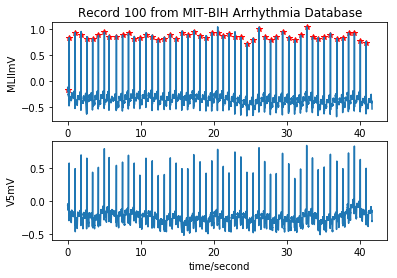

In [24]:
# read a wfdb record and annotation. Plot all channels, and the annotation on top of channel 0

record = wf.rdrecord(path, sampto=15000)
annotation = wf.rdann(path, 'atr', sampto=15000)

wf.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

In [37]:
record.sig_name

['MLII', 'V5']

ECG channel type: MLII


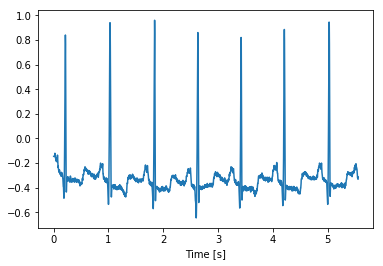

In [38]:
from matplotlib import pyplot as plt

# Select one of the channels (there are two)
chid = 0
data = record.p_signal
channel = data[:, chid]

print ('ECG channel type:', record.sig_name[chid])

# Plot only the first 2000 samples
howmany = 2000

# Calculate time values in seconds
times = np.arange(howmany, dtype = 'float') / record.fs
plt.plot(times, channel[ : howmany])
plt.xlabel('Time [s]')
plt.show()

In [ ]:
help(record)

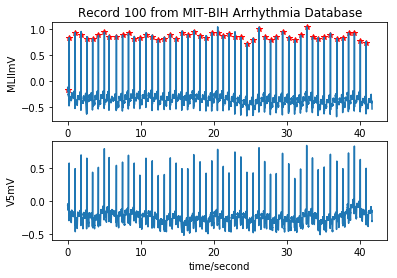

In [40]:
path = 'data/mitdb\\100'

record = wf.rdrecord(path, sampto=15000)
annotation = wf.rdann(path, 'atr', sampto=15000)

wf.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')

ECG channel type: MLII


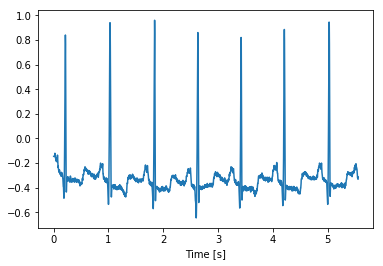

In [41]:
from matplotlib import pyplot as plt

# Select one of the channels (there are two)
chid = 0
data = record.p_signal
channel = data[:, chid]

print ('ECG channel type:', record.sig_name[chid])

# Plot only the first 2000 samples
howmany = 2000

# Calculate time values in seconds
times = np.arange(howmany, dtype = 'float') / record.fs
plt.plot(times, channel[ : howmany])
plt.xlabel('Time [s]')
plt.show()

In [48]:
help(record)

Help on Record in module wfdb.io.record object:

class Record(BaseRecord, wfdb.io._header.HeaderMixin, wfdb.io._signal.SignalMixin)
 |  The class representing single segment WFDB records.
 |  
 |  Record objects can be created using the initializer, by reading a WFDB
 |  header with `rdheader`, or a WFDB record (header and associated dat files)
 |  with `rdrecord`.
 |  
 |  The attributes of the Record object give information about the record as
 |  specified by: https://www.physionet.org/physiotools/wag/header-5.htm
 |  
 |  In addition, the d_signal and p_signal attributes store the digital and
 |  physical signals of WFDB records with at least one channel.
 |  
 |  Examples
 |  --------
 |  >>> record = wfdb.Record(record_name='r1', fs=250, n_sig=2, sig_len=1000,
 |                       file_name=['r1.dat','r1.dat'])
 |  
 |  Method resolution order:
 |      Record
 |      BaseRecord
 |      wfdb.io._header.HeaderMixin
 |      wfdb.io._header.BaseHeaderMixin
 |      wfdb.io._signal